# Discussion Realted with Outliers And Impact on Machine Learning

Outliers - In Simple words outlers are those data which are much different from rest of the data in the dataset.



 Which machine learning Models are Sensitive to outliers ?
 
 1) Naive Bayes classifer-----> Not sensitive to ouliers

 2) SVM                  -----> Not sensitive to ouliers

 3) Linear Regression    -----> Sensitive to outliers

 4) Logistic Regression -----> Sensitive to outliers

 5) Decision Tree Rgressor or classifier -----> Not sensitive to ouliers

 6) Ensemble(Random Forest, XGbosst,Gradient Descent) -----> Not sensitive to ouliers

 7) KNN                 -----> Not sensitive to ouliers

 8) Kmeans              -----> Sensitive to outliers

 9) Hierarichal         -----> Sensitive to outliers

 10) PCA                -----> Sensitive to outliers

 11) Neural Networks    -----> Sensitive to outliers



In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df["Age"].isnull().sum()

177

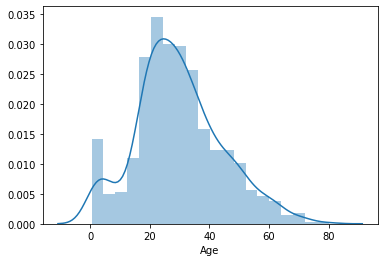

In [ ]:
import seaborn as sns
sns.distplot(df["Age"].dropna())


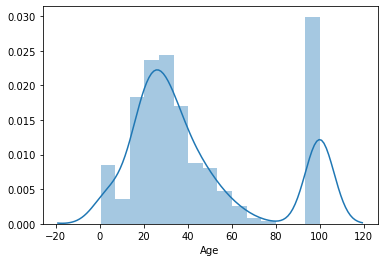

In [ ]:
# As above we can see there is no outlier
# But lets just fill a outlier for testing purpose

sns.distplot(df["Age"].fillna(100))

# Technique 1 : Removing outlier when data is in Guassian distribution

Text(0, 0.5, 'No of passenger')

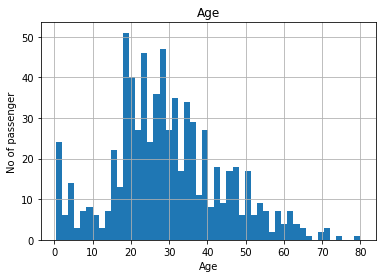

In [ ]:
figure=df.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No of passenger")

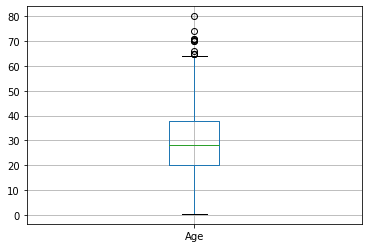

In [ ]:
# Mostly box plot is used to check the outlier

figure=df.boxplot(column="Age")
# Hence from the boxplot figure we can there are outliers ,outliers are shown in circle in the figure

In [ ]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Assuming Age follows a Guassian Distribution we will calculate the boundaries which differentiates the outliers, removing outliers

# we will first take mean , so that from mean we can take three standard deviation to the left and right
# upper_boundary is from mean to third standard deviation in right
upper_boundary=df["Age"].mean()+ 3*df["Age"].std()

# lower_boundary is from mean to third standard deviation in left
lower_boundary=df["Age"].mean()- 3*df["Age"].std()

print(upper_boundary),print(lower_boundary),print(df["Age"].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


(None, None, None)

*outliers for Skewed features*

Text(0, 0.5, 'No of passenger')

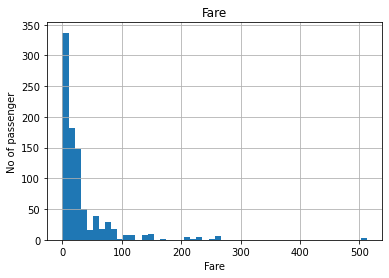

In [ ]:
figure=df.Fare.hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No of passenger")

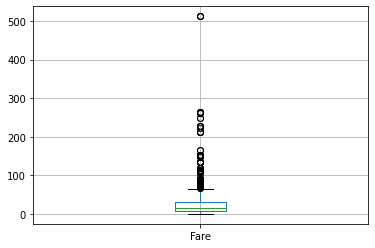

In [ ]:
# Mostly box plot is used to check the outlier

figure=df.boxplot(column="Fare")

In [ ]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# Lets calculate the Inter QUantile range to calculate the boundaries , Inter QUantile range is the difference between 75 percentile and 25 percentile
IQR=df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [ ]:
# here the lower bridge ,upper_bridge will be calculated based on IQR

lower_bridge=df["Fare"].quantile(0.25)-(IQR*1.5)
higher_bridge=df["Fare"].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(higher_bridge)

-26.724
65.6344


(None, None)

In [ ]:
# to find the most extreme outliers we multiply it by 3
lower_bridge=df["Fare"].quantile(0.25)-(IQR*3)
higher_bridge=df["Fare"].quantile(0.75)+(IQR*3)
print(lower_bridge),print(higher_bridge)

-61.358399999999996
100.2688


(None, None)

Applying feature engineering with algorithm

In [ ]:
data=df.copy()

In [ ]:
# 73 is the value we got after removing outlier from Age feature (check above in Age) 
# Replacing all the paramtere in Age above 73 to 73 (as any value above 73 is an outlier and we have to remove the outlier)
data.loc[data["Age"]>73,"Age"]=73

In [ ]:
# 100 is the value we got after removing outlier from Fare feature (check above in Fare) 
# Replacing all the paramtere in Fare above 100 to 100 (as any value above 100 is an outlier and we have to remove the outlier)
data.loc[data["Fare"]>100,"Age"]=100

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Lets apply algorithm after remvong the outliers
# we are just applying it on Fare and Age only as it is practise session for us
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[["Age","Fare"]].fillna(0),data["Survived"],test_size=0.3)

In [ ]:
# Applying logistic regression to the data after the split
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test) # this will give us roc_auc_score


from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(y_test,y_pred1[:,1])))


Accuracy_score: 0.7164179104477612
roc_auc_score : 0.7120322817314747


In [ ]:
# Lets do the same with RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test) # this will give us roc_auc

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6940298507462687
roc_auc_score : 0.7209586696013696
